# 1. Import and Understand the data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv("global_bleaching_environmental.csv")

C:\Users\phamn\AppData\Local\Temp\ipykernel_19912\3241338298.py:1: DtypeWarning: Columns (13,15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("global_bleaching_environmental.csv")


In [7]:
df.head()

,Site_ID,Sample_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Reef_ID,Realm_Name,Ecoregion_Name,Country_Name,...,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date,Site_Comments,Sample_Comments,Bleaching_Comments
0,2501,10324336,Donner,23.163,-82.5260,Atlantic,nd,Tropical Atlantic,Cuba and Cayman Islands,Cuba,...,5,0,0,0.74,7.25,0.18,15/09/2005,nd,nd,nd
1,3467,10324754,Donner,-17.575,-149.7833,Pacific,nd,Eastern Indo-Pacific,Society Islands French Polynesia,French Polynesia,...,4,0,0.26,0.67,4.65,0.19,15/03/1991,The bleaching does not appear to have gained ...,The bleaching does not appear to have gained ...,nd
2,1794,10323866,Donner,18.369,-64.5640,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United Kingdom,...,7,0,0,1.04,11.66,0.26,15/01/2006,nd,nd,nd
3,8647,10328028,Donner,17.760,-64.5680,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,4,0,0,0.75,5.64,0.2,15/04/2006,nd,nd,nd
4,8648,10328029,Donner,17.769,-64.5830,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,5,0,0,0.92,6.89,0.25,15/04/2006,nd,nd,nd


In [8]:
df.describe()

,Site_ID,Sample_ID,Latitude_Degrees,Longitude_Degrees,Cyclone_Frequency,Date_Day,Date_Month,Date_Year
count,4.136100e+04,4.136100e+04,41361.000000,41361.000000,41361.000000,41361.000000,41361.000000,41361.000000
mean,7.455816e+04,1.012880e+07,7.558085,34.966127,52.159650,16.037402,6.902686,2007.796765
std,2.520418e+05,1.373151e+06,15.732185,103.404598,7.589593,7.837400,2.875063,6.073043
min,1.000000e+00,9.623000e+03,-30.262500,-179.974300,18.310000,1.000000,1.000000,1980.000000
25%,3.502000e+03,1.031108e+07,-4.902500,-78.385600,47.940000,10.000000,5.000000,2003.000000
50%,5.925000e+03,1.031628e+07,10.776100,96.843300,50.920000,15.000000,7.000000,2007.000000
75%,8.368000e+03,1.032149e+07,20.050500,120.880400,55.730000,22.000000,9.000000,2013.000000
max,1.000060e+06,1.033171e+07,36.750000,179.964500,105.800000,31.000000,12.000000,2020.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Site_ID                                41361 non-null  int64  
 1   Sample_ID                              41361 non-null  int64  
 2   Data_Source                            41361 non-null  object 
 3   Latitude_Degrees                       41361 non-null  float64
 4   Longitude_Degrees                      41361 non-null  float64
 5   Ocean_Name                             41361 non-null  object 
 6   Reef_ID                                41361 non-null  object 
 7   Realm_Name                             41361 non-null  object 
 8   Ecoregion_Name                         41361 non-null  object 
 9   Country_Name                           41361 non-null  object 
 10  State_Island_Province_Name             41361 non-null  object 
 11  Ci

Before proceeding to null value checks, remove the following columns to streamline the dataset and optimize memory usage:
- Unique identifiers (e.g., Reef_ID, Site_ID) as they are not useful for EDA or machine learning.
- Highly granular columns (e.g., Data_Source, Ecoregion_Name, Country_Name) with 50+ unique values, which are too detailed for effective EDA or encoding for machine learning - models.
- Redundant or uninformative columns (e.g., Realm_Name, derived from Ocean_Name; SSTA_Mean, containing only 0 or NaN values) as they provide no meaningful information.
- Date components (Date_Day, Date_Month, Date_Year) since they are already extracted from the Date column


In [10]:
df = df.drop(['Reef_ID', 'State_Island_Province_Name', 'City_Town_Name', 'Site_Name', 'Site_Comments', 
              'Sample_Comments', 'Bleaching_Comments', 'Site_ID', 'Sample_ID','Data_Source', 'Ecoregion_Name', 
              'Country_Name', 'Realm_Name', 'SSTA_Mean', 'Date_Day', 'Date_Month','Date_Year'], axis=1)

# 2. Data cleaning

## 2.1 Missing values

### 1. Identify missing values


In [11]:
# Replace "nd" with nan
df = df.replace("nd", np.nan)

# Calculate missing values count and percentage
missing_values = df.isnull().sum()
missing_perct = (missing_values / len(df)) * 100

missing_df = pd.DataFrame(
      {'Missing Count' : missing_values,
      'Missing Percentage' : missing_perct
})

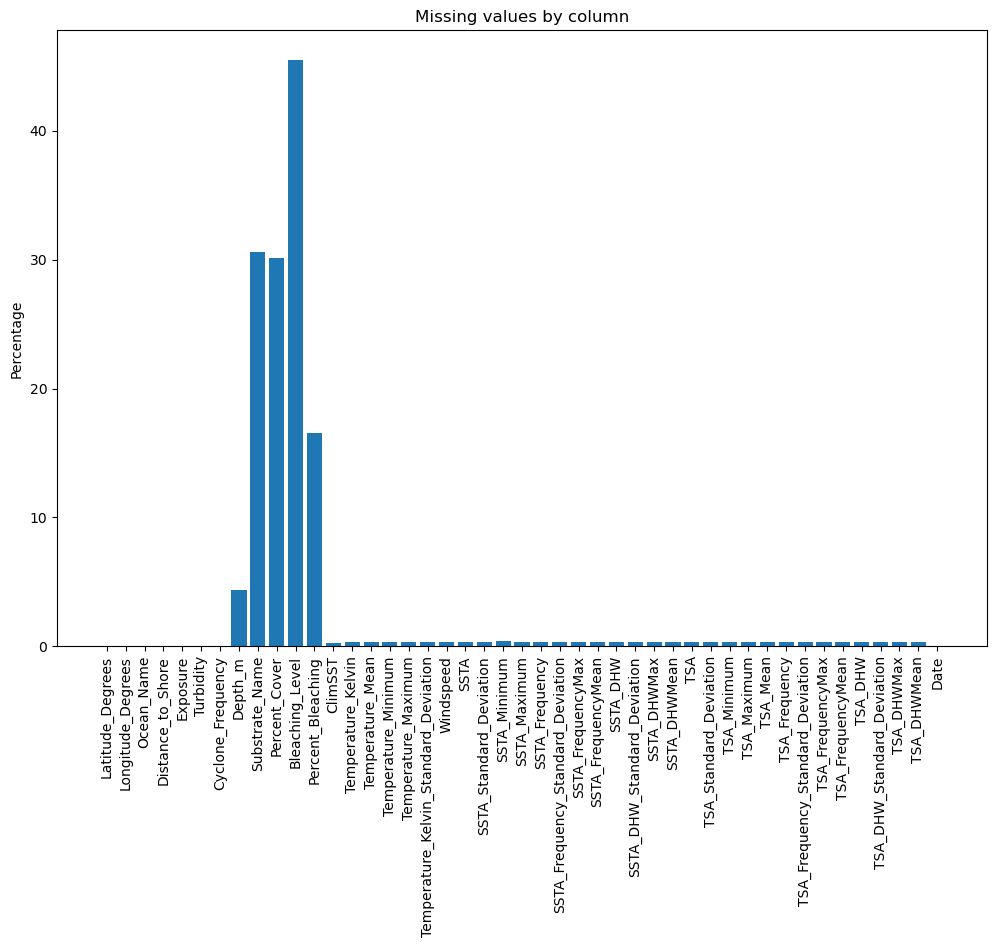

In [12]:
# Display columns with missing values
plt.figure(figsize = (12, 8))
plt.bar(missing_df.index, missing_df['Missing Percentage'])
plt.xticks(rotation = 90)
plt.title("Missing values by column")
plt.ylabel("Percentage")
plt.show();

### 2. Handle missing values


Drop the Bleaching_Level column due to excessive missing data. Although described as containing both coral population and coral colony data, the dataset only includes coral population, with coral colony data entirely absent. Similar with Substrate_Name, when over 30% values are missing

In [13]:
df = df.drop(['Bleaching_Level', 'Substrate_Name'], axis =1)

Numerical columns like Depth_m, Percent_Cover, etc., contain missing values. Dropping these rows is not ideal, as it would remove valuable data from other columns. Instead, I use statistical imputation: apply the mean for SSTA, SSTA_FrequencyMax, Cyclone_Frequency, Temperature_Maximum, TSA (normally/close to normally distributed) and the median for other skewed numerical columns. First, convert these columns from object data types to appropriate numerical types before imputation.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 43 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Latitude_Degrees                       41361 non-null  float64
 1   Longitude_Degrees                      41361 non-null  float64
 2   Ocean_Name                             41361 non-null  object 
 3   Distance_to_Shore                      41359 non-null  object 
 4   Exposure                               41361 non-null  object 
 5   Turbidity                              41355 non-null  object 
 6   Cyclone_Frequency                      41361 non-null  float64
 7   Depth_m                                39562 non-null  object 
 8   Percent_Cover                          28906 non-null  object 
 9   Percent_Bleaching                      34515 non-null  object 
 10  ClimSST                                41248 non-null  object 
 11  Te

In [15]:
# Converting to float
cols_to_float = [
    'Distance_to_Shore','Turbidity','Cyclone_Frequency','Depth_m','Percent_Cover','Percent_Bleaching','ClimSST',
    'Temperature_Kelvin','Temperature_Mean','Temperature_Minimum','Temperature_Maximum','Temperature_Kelvin_Standard_Deviation',
    'Windspeed','SSTA','SSTA_Standard_Deviation','SSTA_Minimum','SSTA_Maximum','SSTA_Frequency','SSTA_Frequency_Standard_Deviation','SSTA_FrequencyMax',
    'SSTA_FrequencyMean','SSTA_DHW','SSTA_DHW_Standard_Deviation','SSTA_DHWMax','SSTA_DHWMean',
    'TSA','TSA_Standard_Deviation','TSA_Minimum','TSA_Maximum','TSA_Mean','TSA_Frequency','TSA_Frequency_Standard_Deviation','TSA_FrequencyMax','TSA_FrequencyMean',
    'TSA_DHW','TSA_DHW_Standard_Deviation','TSA_DHWMax','TSA_DHWMean'
]

for col in cols_to_float:
    df[col] = df[col].astype('float64')

In [16]:
# Impute Mean to normally or close to normally distributed variables
df['SSTA'] = df['SSTA'].fillna(df['SSTA'].mean())
df['SSTA_FrequencyMax'] = df['SSTA_FrequencyMax'].fillna(df['SSTA'].mean())
df['TSA'] = df['TSA'].fillna(df['TSA'].mean())
df['Cyclone_Frequency'] = df['Cyclone_Frequency'].fillna(df['Cyclone_Frequency'].mean())
df['Temperature_Maximum'] = df['Temperature_Maximum'].fillna(df['Temperature_Maximum'].mean())


# Impute Median to remanining continous variables
cols_to_impute_median = ['Distance_to_Shore','Turbidity','Depth_m','Percent_Cover','Percent_Bleaching','ClimSST',
    'Temperature_Kelvin','Temperature_Mean','Temperature_Minimum','Temperature_Kelvin_Standard_Deviation',
    'Windspeed','SSTA_Standard_Deviation','SSTA_Minimum','SSTA_Maximum','SSTA_Frequency','SSTA_Frequency_Standard_Deviation',
    'SSTA_FrequencyMean','SSTA_DHW','SSTA_DHW_Standard_Deviation','SSTA_DHWMax','SSTA_DHWMean',
    'TSA_Standard_Deviation','TSA_Minimum','TSA_Maximum','TSA_Mean','TSA_Frequency','TSA_Frequency_Standard_Deviation','TSA_FrequencyMax','TSA_FrequencyMean',
    'TSA_DHW','TSA_DHW_Standard_Deviation','TSA_DHWMax','TSA_DHWMean']
for col in cols_to_impute_median:
    df[col] = df[col].fillna(df[col].median())

## 2.2 Duplicate value

In [17]:
df.duplicated().sum()

178

In [18]:
df = df.drop_duplicates()

## 2.3 Label Encoding

As I use Percent_Bleaching as a target for classification models, I found that based on the Bleaching_Comments, percent bleaching are categorized into 3 groups: 
- Mild (1-10% bleached)
- Moderate (11-50% bleached)
- Severe (>50% Bleached)

Therefore I group these percent_bleaching into 3 above categories

In [19]:
def classify_bleaching(percent_bleaching):
    percent_bleaching = float(percent_bleaching)
    if 0 <= percent_bleaching <= 10:
        return 'Mild'
    elif 11 <= percent_bleaching <= 50:
        return 'Moderate'
    else:
        return 'Severe'

df['Percent_Bleaching_Category'] = df['Percent_Bleaching'].apply(classify_bleaching)

In [20]:
list(df.select_dtypes('object'))

['Ocean_Name', 'Exposure', 'Date', 'Percent_Bleaching_Category']

In [21]:
# Use Ordinal Encoding for Exposure and Percent_Bleaching_Category

from sklearn.preprocessing import OrdinalEncoder
# Apply ordinal encoding
ordinal_features = ['Percent_Bleaching_Category', 'Exposure']
category_order = [
    ['Mild', 'Moderate', 'Severe'],     
    ['Sheltered', 'Sometimes', 'Exposed']
]
encoder = OrdinalEncoder(categories=category_order)
df[ordinal_features] = encoder.fit_transform(df[ordinal_features])

In [22]:
# Apply One Hot Encoding for Exposure and Substrate_Name
from sklearn.preprocessing import OneHotEncoder

def encode_column(df, column):
    ohe = OneHotEncoder(sparse_output=False, drop='first')
    encoded_array = ohe.fit_transform(df[[column]])
    encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out([column]))
    return encoded_df

# Column need OHE
categorical_column = ['Ocean_Name']

# Apply OHE for each columns
encoded_dfs = [encode_column(df, col) for col in categorical_column]

# Concat the encoded DataFrame into original one
df = pd.concat([df.reset_index(drop=True)] + encoded_dfs, axis=1)

## 2.4 Convert datatype

As continous values were already converted to float, I only need to convert columns that I just applied Ordinal Encoding and One Hot Encoding

I also need to covert Data to date time format

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41183 entries, 0 to 41182
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Latitude_Degrees                       41183 non-null  float64
 1   Longitude_Degrees                      41183 non-null  float64
 2   Ocean_Name                             41183 non-null  object 
 3   Distance_to_Shore                      41183 non-null  float64
 4   Exposure                               41183 non-null  float64
 5   Turbidity                              41183 non-null  float64
 6   Cyclone_Frequency                      41183 non-null  float64
 7   Depth_m                                41183 non-null  float64
 8   Percent_Cover                          41183 non-null  float64
 9   Percent_Bleaching                      41183 non-null  float64
 10  ClimSST                                41183 non-null  float64
 11  Te

In [24]:
# Convert datatype of Exposure and Percent_Bleaching 
df['Exposure'] = df['Exposure'].astype('category')
df['Percent_Bleaching_Category'] = df['Percent_Bleaching_Category'].astype('category')

# Convert columns in One Hot Encoding
OHE_columns = ['Ocean_Name_Atlantic', 'Ocean_Name_Indian', 'Ocean_Name_Pacific', 'Ocean_Name_Red Sea']
for col in OHE_columns:
    df[col] = df[col].astype('category')

In [25]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41183 entries, 0 to 41182
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Latitude_Degrees                       41183 non-null  float64       
 1   Longitude_Degrees                      41183 non-null  float64       
 2   Ocean_Name                             41183 non-null  object        
 3   Distance_to_Shore                      41183 non-null  float64       
 4   Exposure                               41183 non-null  category      
 5   Turbidity                              41183 non-null  float64       
 6   Cyclone_Frequency                      41183 non-null  float64       
 7   Depth_m                                41183 non-null  float64       
 8   Percent_Cover                          41183 non-null  float64       
 9   Percent_Bleaching                      41183 non-null  float6

# 3. Exploratory Data Analysis (EDA)

## 3.1 Univariate Analysis

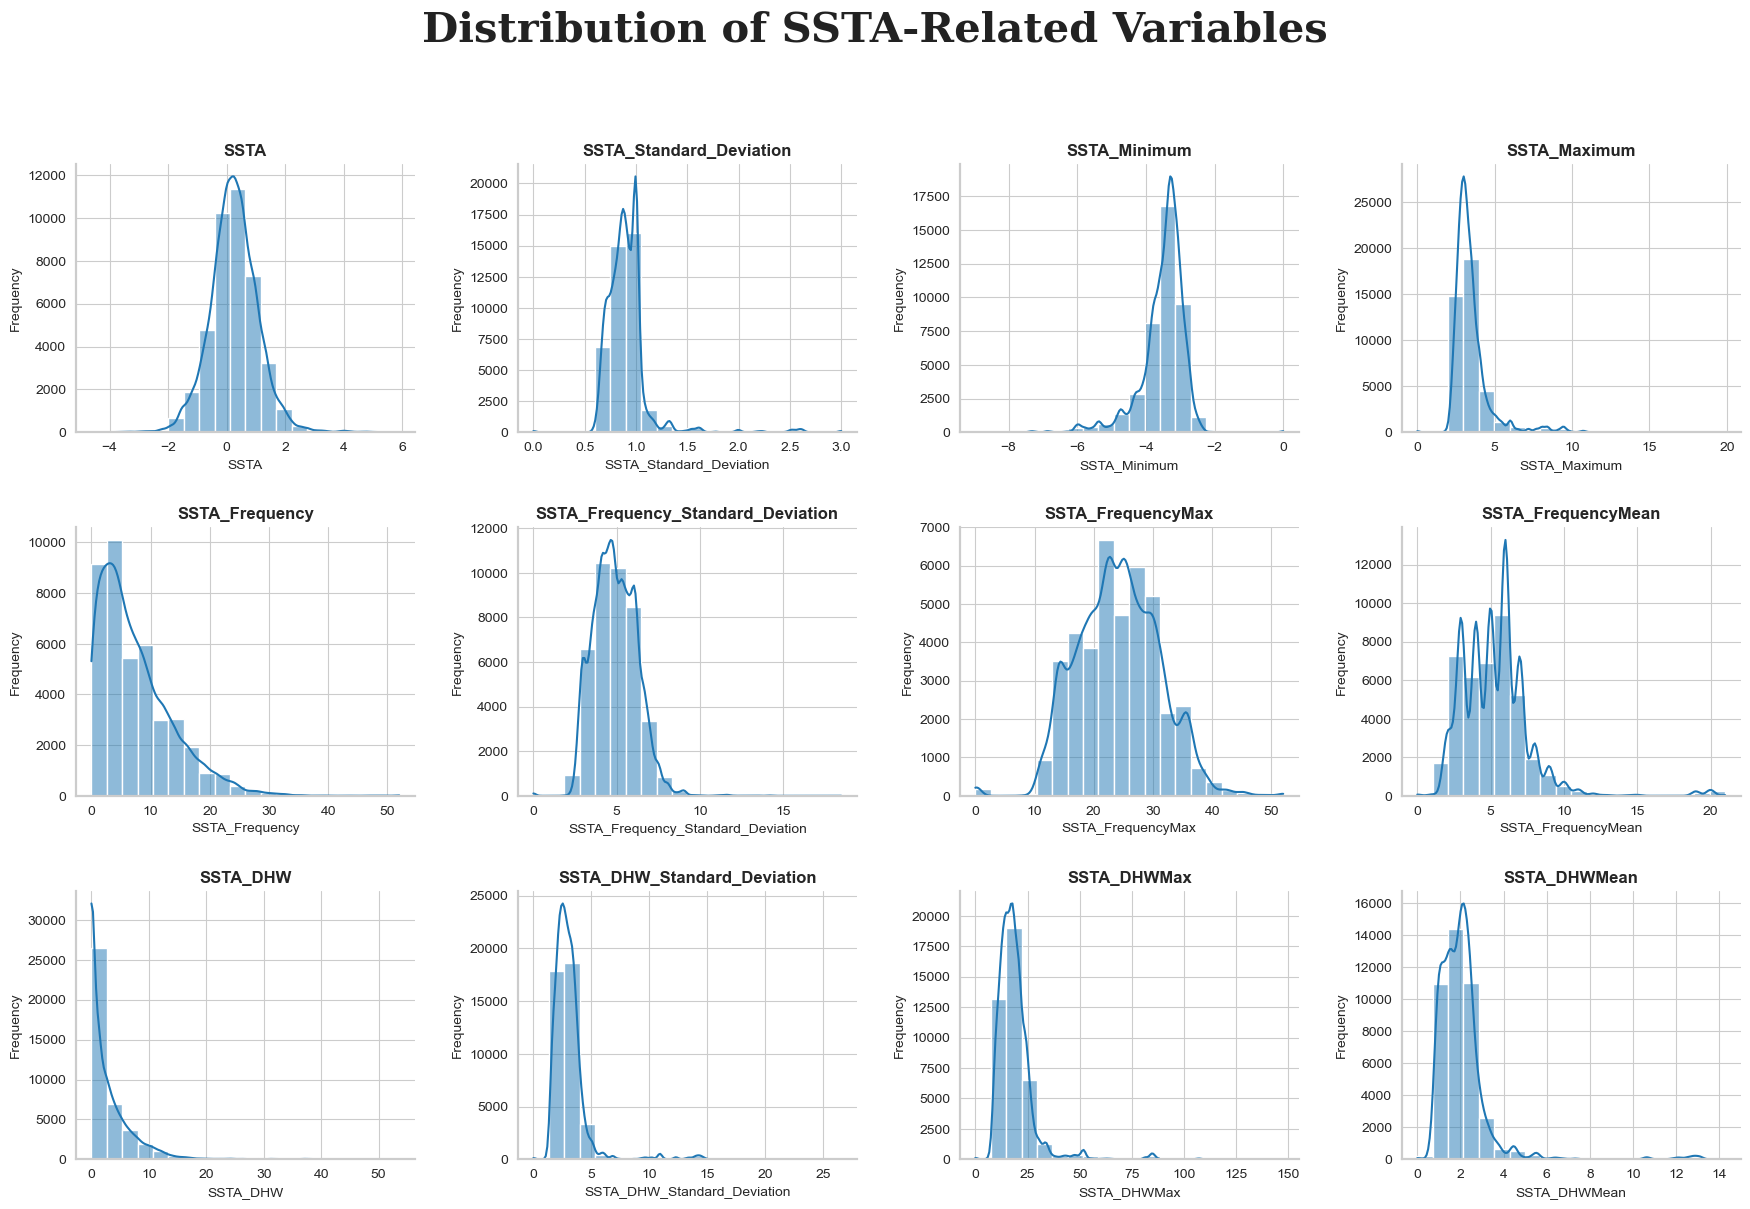

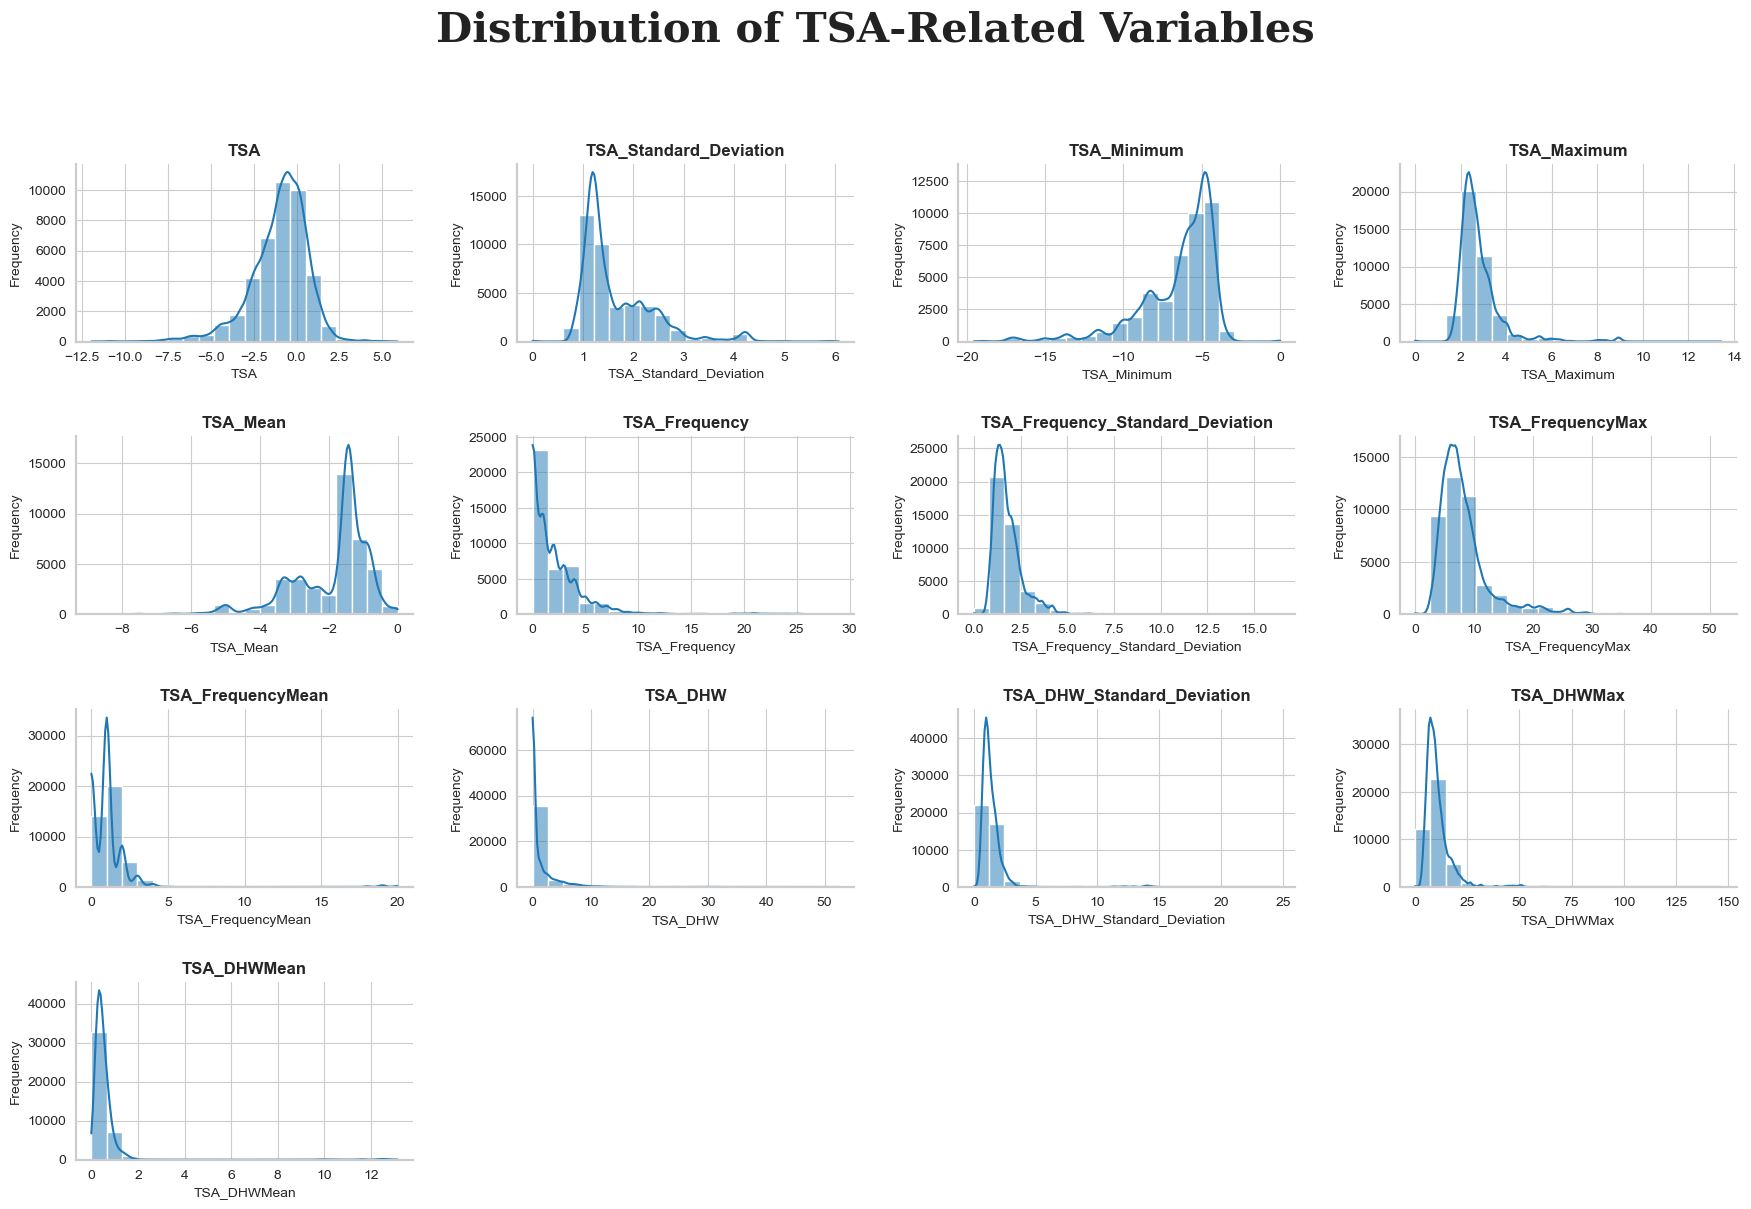

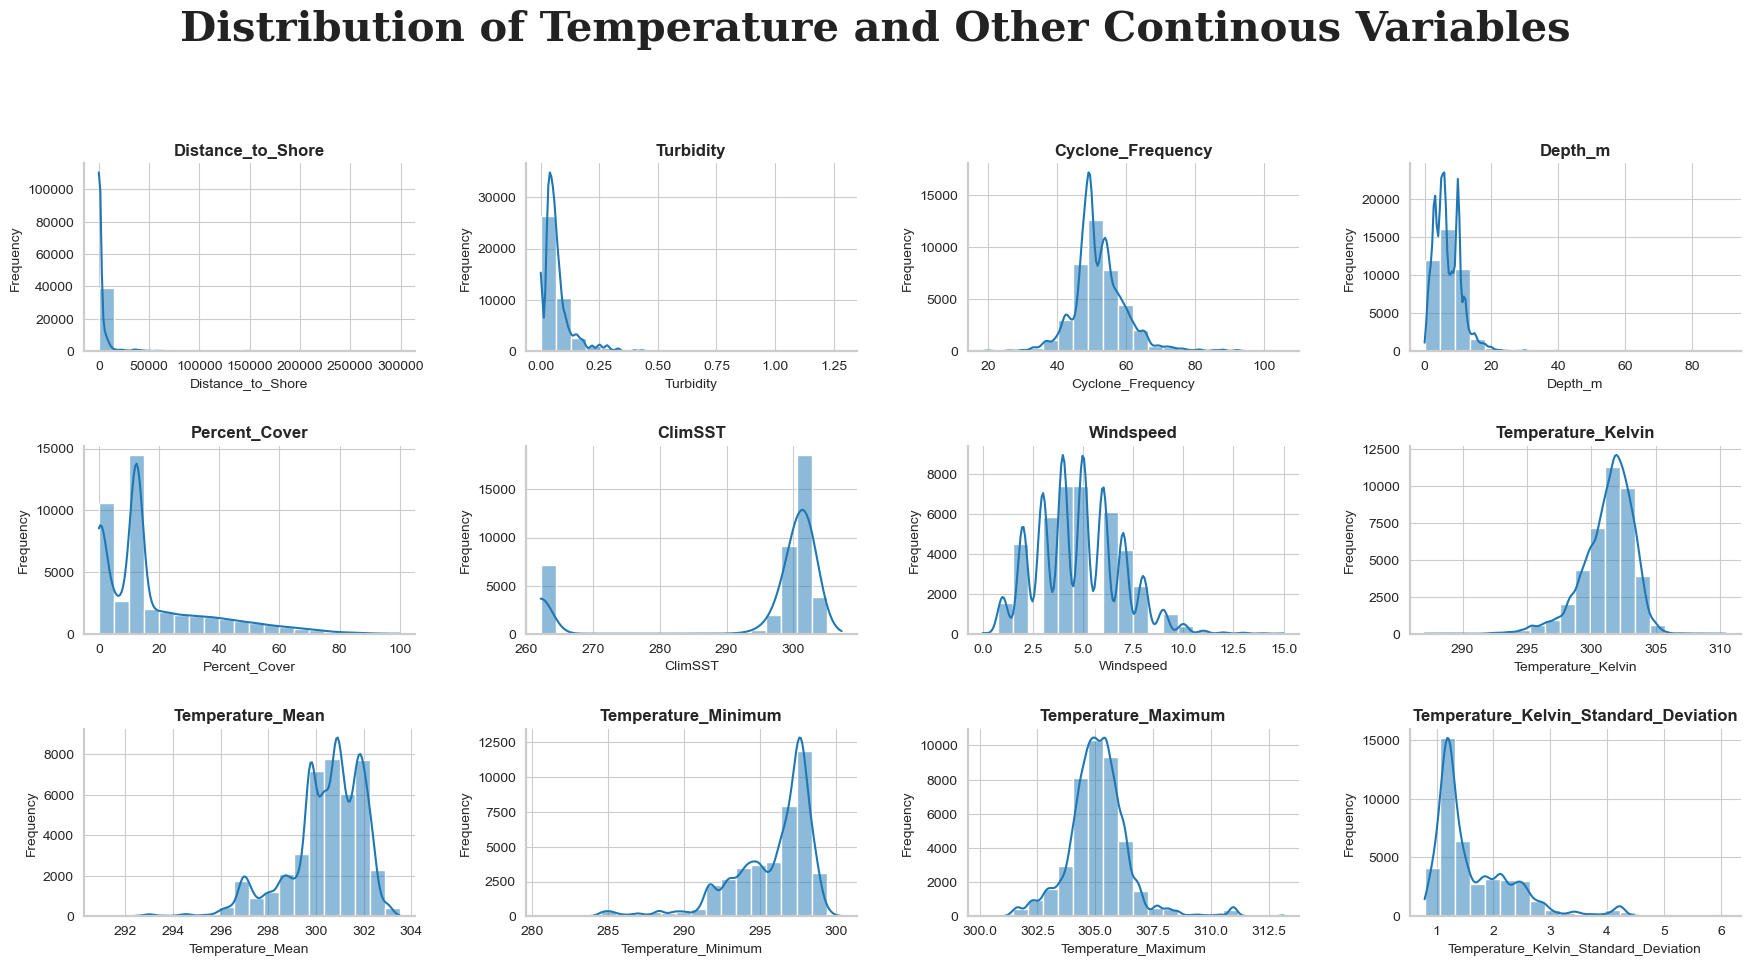

In [27]:
# Define groups of numerical columns
ssta_cols = [
    'SSTA', 'SSTA_Standard_Deviation', 'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Frequency',
    'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax', 'SSTA_FrequencyMean',
    'SSTA_DHW', 'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean'
]
tsa_cols = [
    'TSA', 'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
    'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax',
    'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation', 'TSA_DHWMax',
    'TSA_DHWMean'
]
temp_and_other_cols = [
    'Distance_to_Shore', 'Turbidity', 'Cyclone_Frequency', 'Depth_m', 'Percent_Cover',
    'ClimSST', 'Windspeed', 'Temperature_Kelvin', 'Temperature_Mean',
    'Temperature_Minimum', 'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation'
]

# Dictionary of column groups, titles, and grid sizes
col_groups = {
    "SSTA-Related Variables": (ssta_cols, 3, 4),
    "TSA-Related Variables": (tsa_cols, 4, 4),
    "Temperature and Other Continous Variables": (temp_and_other_cols, 4, 4) 
}

# Set Seaborn style
sns.set_style("whitegrid")

def plot_histograms(cols, rows, cols_grid, title):
  
    # Create subplot grid
    fig, axes = plt.subplots(rows, cols_grid, figsize=(18, 12) if rows > 1 else (8, 4))
    axes = axes.flatten() if rows * cols_grid > 1 else [axes]

    # Set figure title
    fig.suptitle(f"Distribution of {title}", fontsize=30 if rows > 1 else 20, 
                 fontweight='bold', fontfamily='serif', color='#222', y=1.02)

    # Plot histograms with KDE
    for i, col in enumerate(cols):
        sns.histplot(data=df, x=col, bins=20, kde=True, ax=axes[i])
        axes[i].set_title(col, fontsize=12, fontweight='bold')
        axes[i].set_xlabel(col, fontsize=10)
        axes[i].set_ylabel("Frequency", fontsize=10)

    # Remove unused subplots
    for j in range(len(cols), rows * cols_grid):
        fig.delaxes(axes[j])

    # Customize spines
    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(1.6)
        ax.spines['bottom'].set_linewidth(1.6)

    # Adjust layout
    sns.despine()
    plt.tight_layout(pad=2.5)
    plt.show()

# Generate plots for each group
for title, (cols, rows, cols_grid) in col_groups.items():
    plot_histograms(cols, rows, cols_grid, title)

#### SSTA-related variables

- The SSTA (Sea Surface Temperature Anomaly) distribution is centered around 0, indicating that temperature anomalies are generally small but can reach extreme values (up 20°C for maximums). The minimum and maximum values show a skewed distribution, with data points peaking around 5–10°C for maxima, suggesting occasional extreme heat stress events.
- SSTA_Frequency and its mean are right-skewed, with most values concentrated below 10–20, indicating that high-frequency anomalies are less common. SSTA_DHW (Degree Heating Weeks) and its maximum (DHWMax) show a long tail, with peaks around 25 and extreme values up to 150, highlighting significant thermal stress periods that correlate with bleaching events.
- Both SSTA and DHW standard deviations are tightly clustered near 0–2 and 0–5, respectively, suggesting relatively consistent variability across observations, with occasional outliers indicating localized stress variability.

##### TSA-related variables

- TSA (Thermal Stress Anomaly) follows a similar pattern to SSTA, centered around 0 with a slight skew, and maxima extending to 5°C, reflecting intense thermal stress events.
- TSA_Frequency and FrequencyMean are right-skewed, with most values below 20–30, suggesting infrequent but impactful stress events. TSA_DHW and DHWMax show a wide range (up to 150), with a peak around 0–25, reinforcing the presence of prolonged thermal stress linked to bleaching.
- TSA standard deviations are low (0–2), indicating consistent stress levels, while DHW standard deviations peak around 0–5, with a long tail, suggesting variability in the duration of stress events.

#### Temperature and other Continous variables

- Temperature are clustered around 300-305 Kelvin (26–31°C), with maxima extending to 312 Kelvin (39°C), indicating a range of thermal conditions.
- Depth_m and Distance_to_Shore: Both are right-skewed, with Depth_m peaking around 0–20 meters and Distance_to_Shore around 0–50000 meters, indicating most reefs are in shallow, near-shore environments with some deep or distant outliers.
- Percent_Cover is right-skewed with a peak around 0–20%, suggesting low coral cover in many areas, while ClimSST (Climatological Sea Surface Temperature) is around 300 Kelvin (27°C), reflecting baseline temperature conditions.
- Turbidity, Cyclone_Frequency, Windspeed: Apart from Cyclone, two remaining variables are right-skewed, with Turbidity and Windspeed peaking near 0–0.5 (m⁻¹) and 5 (m/s), respectively, and Cyclone_Frequency around 40-60 events, indicating variable environmental stressors with infrequent high-impact events.

C:\Users\phamn\AppData\Local\Temp\ipykernel_19912\3647585202.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x=col, palette=palette, ax=axes[i])
C:\Users\phamn\AppData\Local\Temp\ipykernel_19912\3647585202.py:30: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.countplot(data=df1, x=col, palette=palette, ax=axes[i])
C:\Users\phamn\AppData\Local\Temp\ipykernel_19912\3647585202.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x=col, palette=palette, ax=axes[i])
C:\Users\phamn\AppData\Local\Temp\ipykernel_19912\3647585202.py:30: UserWarning: The palette list has more values (10) than needed (3), which may not

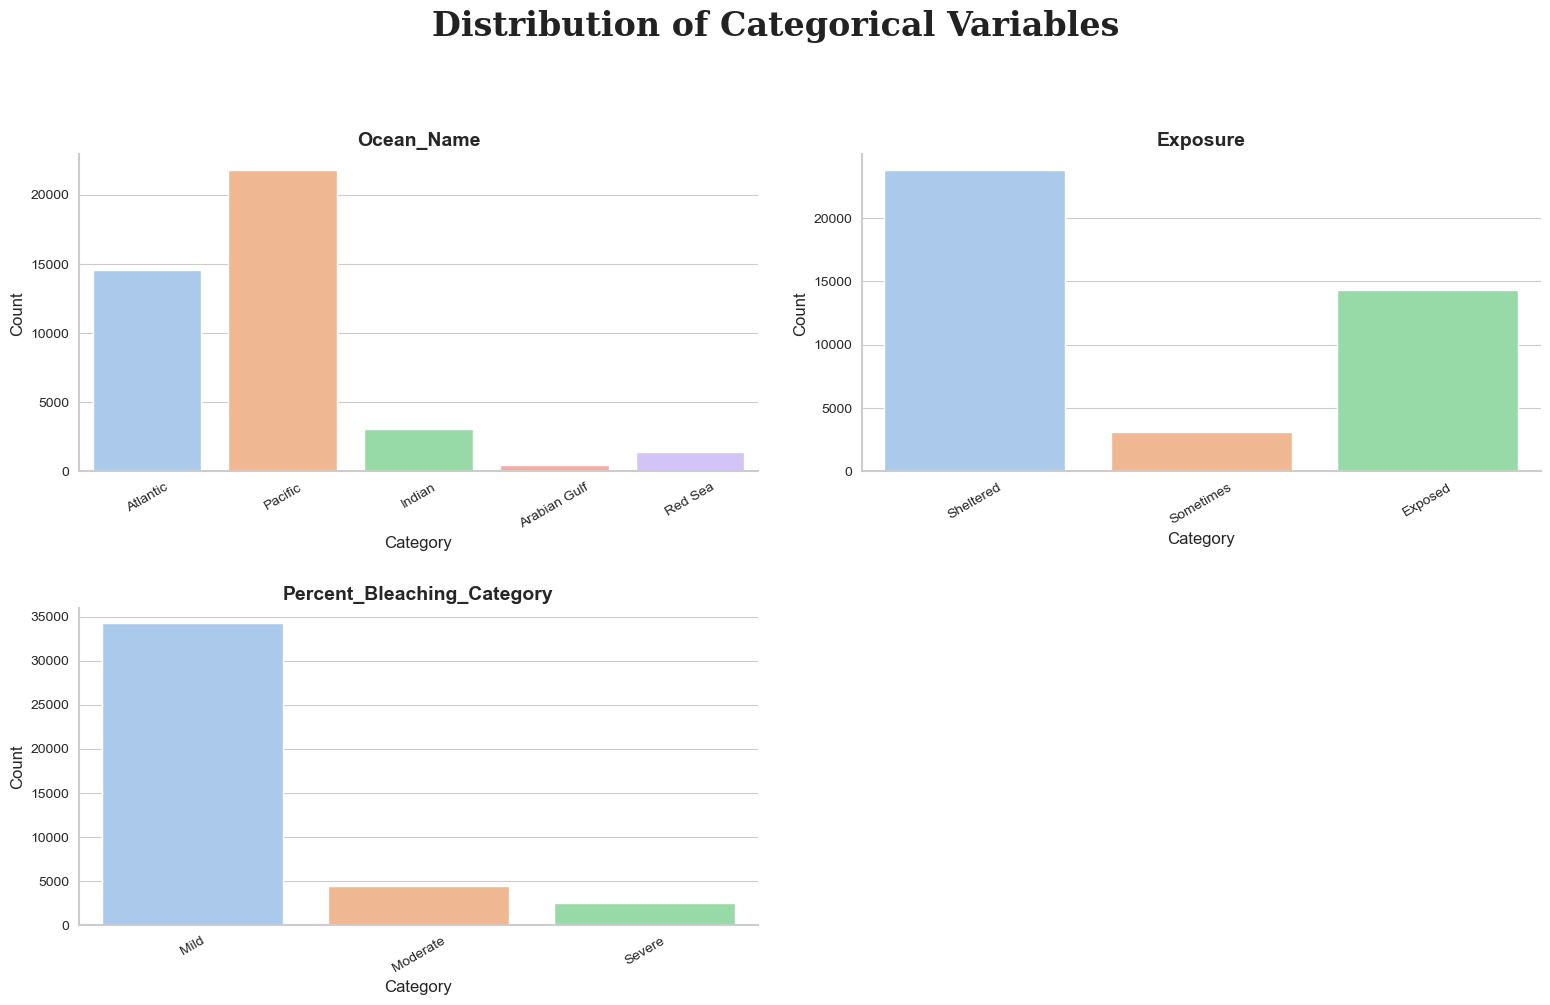

In [28]:
# Create a deep copy of the data to preserve the original
df1 = df.copy(deep=True)

# Mapping dictionaries
exposure_mapping = {0: 'Sheltered', 1: 'Sometimes', 2: 'Exposed'}
percent_bleaching_cat_mapping = {0: 'Mild', 1: 'Moderate', 2: 'Severe'}

# Create new categorical columns
df1['Exposure'] = df1['Exposure'].map(exposure_mapping)
df1['Percent_Bleaching_Category'] = df1['Percent_Bleaching_Category'].map(percent_bleaching_cat_mapping)

sns.set_style("whitegrid")
palette = sns.color_palette("pastel")

# List of categorical columns to visualize
cat_cols = ["Ocean_Name", "Exposure", "Percent_Bleaching_Category"]

# Plotting setup
rows, cols = 2, 2 
total_plots = rows *cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 10))
axes = axes.flatten()

# Set the figure title
fig.suptitle("Distribution of Categorical Variables",
             fontsize=24, fontweight='bold', fontfamily='serif', color='#222', y=1.02)

# Draw count plots and style
for i, col in enumerate(cat_cols):
    sns.countplot(data=df1, x=col, palette=palette, ax=axes[i])
    axes[i].set_title(col, fontsize=14, fontweight='bold')
    axes[i].set_xlabel("Category", fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].tick_params(axis='x', rotation=30)

# Ẩn các subplot dư thừa
for j in range(i + 1, total_plots):
    fig.delaxes(axes[j])

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

plt.tight_layout(pad=2.5)
plt.show();

- Ocean_Name: The Pacific Ocean dominates with the highest count, followed by the Atlantic, Indian, Arabian Gulf, and Red Sea, suggesting the Pacific is the most studied or affected region.
- Exposure: Most sites are classified as Sheltered, with fewer Sometimes or Exposed sites, indicating a bias toward protected reef environments.
- Percent_Bleaching_Category: The majority of observations fall into the "Slow" category, with fewer "Mild," "Moderate," and minimal "Severe" cases, suggesting that severe bleaching is less frequent but still significant.

## 3.2 Bivariate Analysis

C:\Users\phamn\AppData\Local\Temp\ipykernel_19912\1016428435.py:11: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(x=column, hue='Percent_Bleaching_Category', data=df1, palette=color_palette)


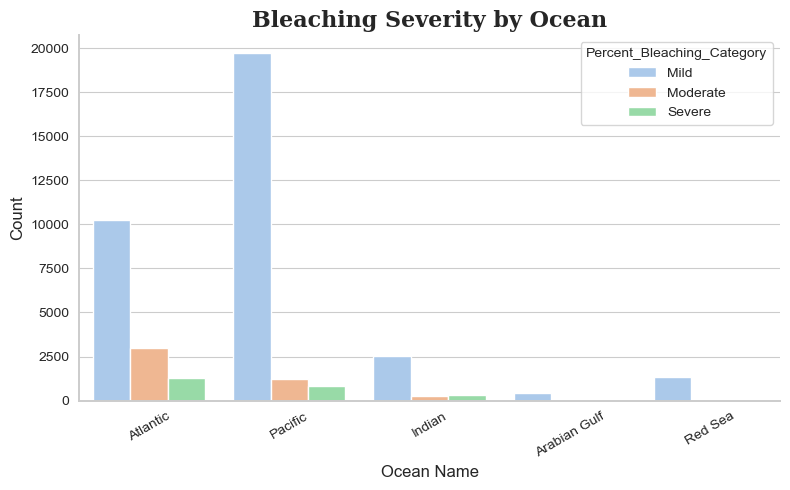

C:\Users\phamn\AppData\Local\Temp\ipykernel_19912\1016428435.py:11: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(x=column, hue='Percent_Bleaching_Category', data=df1, palette=color_palette)


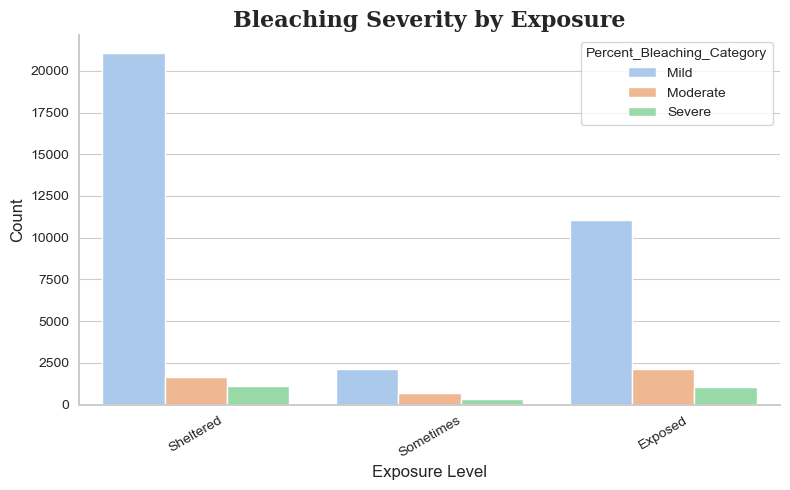

In [29]:
category_groups = {
    "Bleaching Severity by Ocean": ("Ocean_Name", "Ocean Name"),
    "Bleaching Severity by Exposure": ("Exposure", "Exposure Level"),
}

color_palette = sns.color_palette("pastel")

# Define plotting function
def plot_bleaching_severity_by_category(column, xlabel, title):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, hue='Percent_Bleaching_Category', data=df1, palette=color_palette)
    plt.title(title, fontsize=16, fontweight='bold', fontfamily='serif')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=30)

    # Spines and layout
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.4)
    ax.spines['bottom'].set_linewidth(1.4)

    sns.despine()
    plt.tight_layout()
    plt.show();

# Generate plots
for title, (column, xlabel) in category_groups.items():
    plot_bleaching_severity_by_category(column, xlabel, title)

- The Pacific Ocean exhibits the highest count of bleaching observations across all severity categories, with a dominant presence in the "Mild" category, indicating it is the most affected region. The Atlantic also shows a significant "Mild" bleaching count, though lower than the Pacific.
- Sheltered sites have the highest count of "Mild" bleaching, followed by moderate counts of "Moderate" and "Severe" cases, suggesting that protected environments are more commonly observed but still experience varying bleaching levels.

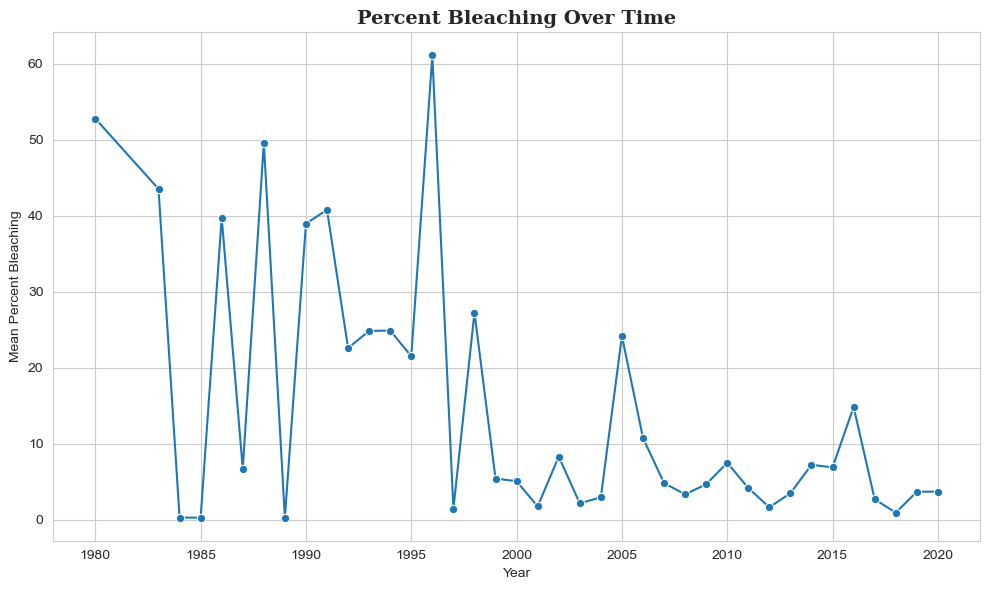

In [30]:
# Extract year from Date
df['Year'] = df['Date'].dt.year

# Create line plot for mean Percent_Bleaching over time
grouped = df.groupby('Year')['Percent_Bleaching'].mean().reset_index()

# Create line plot for mean Percent_Bleaching over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Percent_Bleaching', data=grouped, marker='o')
plt.title("Percent Bleaching Over Time", fontsize=14, fontweight='bold', fontfamily='serif')
plt.xlabel("Year", fontsize=10)
plt.ylabel("Mean Percent Bleaching", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


- The graph illustrates notable bleaching percentages from 1980 to 2020, with pronounced peaks in the mid-1990s and early 2000s, corresponding to major global bleaching events, such as the one in 1998. Following the early 2000s peak, the data shows a general decline, with a noticeable dip during the 2010s. This temporal trend highlights the recurring nature of environmental stress events and emphasizes the increasing impact of factors like rising sea surface temperatures over time.

## 3.3 Multivarite Analysis

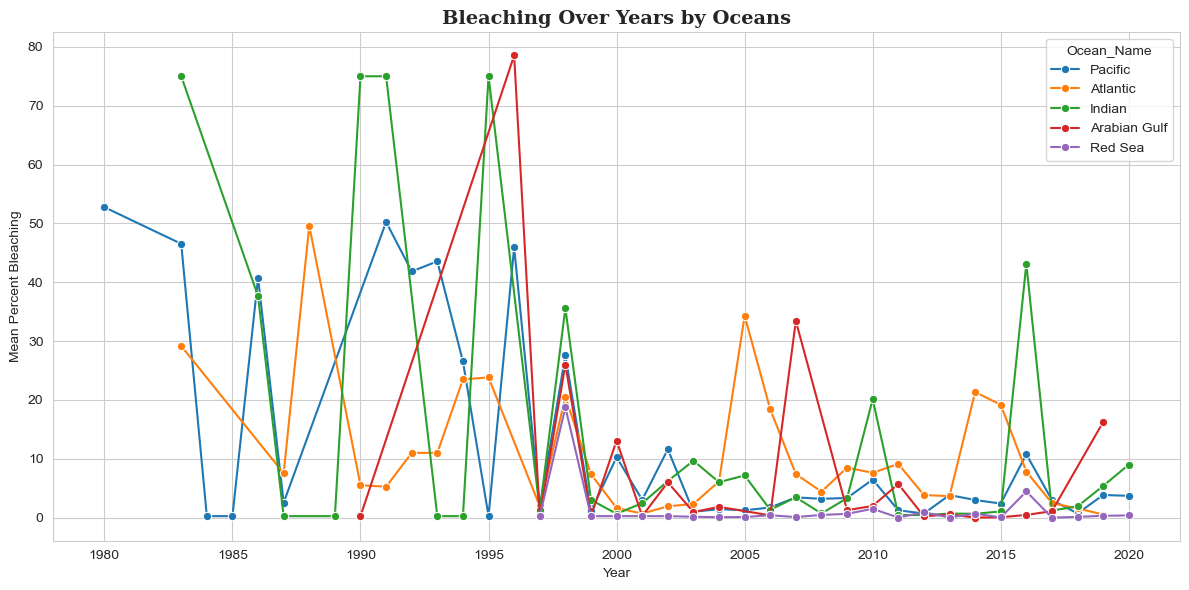

In [31]:
# Filter data for Atlantic and Pacific oceans only
df_filtered = df[df['Ocean_Name'].isin(['Atlantic', 'Pacific', 'Indian', 'Arabian Gulf', 'Red Sea'])]

# Group by Year and Ocean_Name to compute the mean Percent_Bleaching
bleaching_trend = df_filtered.groupby(['Year', 'Ocean_Name'])['Percent_Bleaching'].mean().reset_index()

# Plot the lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=bleaching_trend, x='Year', y='Percent_Bleaching', hue='Ocean_Name', marker='o')
plt.title("Bleaching Over Years by Oceans", fontsize=14, fontweight='bold', fontfamily='serif')
plt.xlabel("Year", fontsize=10)
plt.ylabel("Mean Percent Bleaching", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

- Although from the Univariate Analysis above, the Pacific Ocean experienced the most occurence of bleaching events, from this graph, Indian and Arabian Gulf actually exhibit the highest bleaching levels, with peaks in Indian around 75% and close to 80% (the highest of all time) in Arabian Gulf around the mid-1990s and early 2000s, aligning with global mass bleaching events. The Pacific shows moderate peaks (around 50%) in the same periods, while the Atlantic and Red Sea have lower and more sporadic peaks (below 50%). Post-2000, bleaching levels generally decline across all oceans but show some spikes, particularly in the Indian Ocean around 2015–2020.

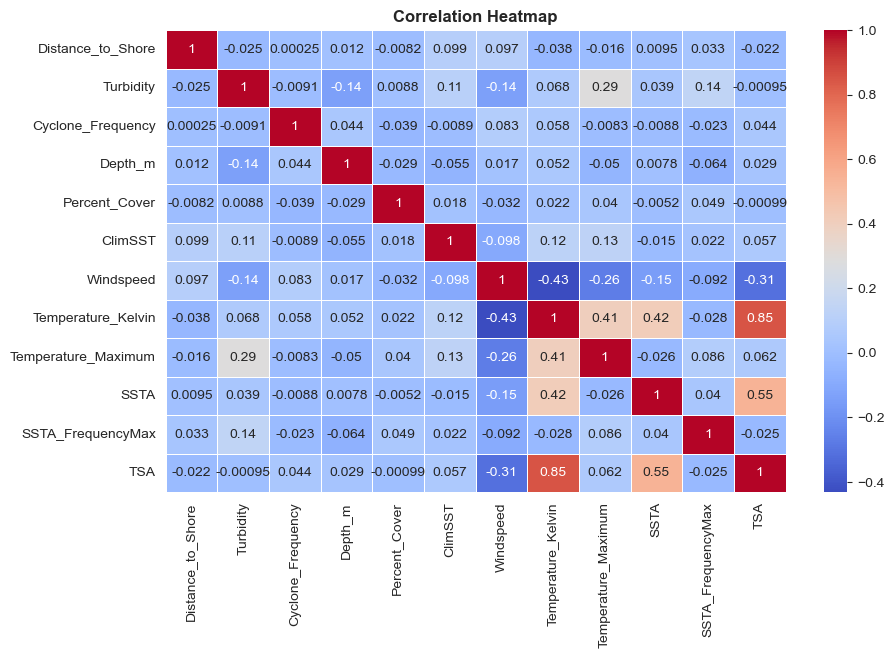

In [32]:
num_cols = ['Distance_to_Shore', 'Turbidity', 'Cyclone_Frequency', 'Depth_m', 'Percent_Cover','ClimSST', 'Windspeed', 'Temperature_Kelvin', 'Temperature_Maximum', 
            'SSTA', 'SSTA_FrequencyMax', 'TSA']

plt.figure(figsize=(10, 6))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap", fontweight = 'bold')
plt.show();

- There is a strong positive correlation between Temperature_Kelvin and Thermal Stress Anomaly (TSA) (0.85), indicating that higher baseline temperatures are closely associated with increased thermal stress. Similarly, Sea Surface Temperature Anomaly (SSTA) shows a strong correlation with TSA (0.55), reinforcing their combined role as key indicators of thermal anomalies that contribute to coral bleaching. Additionally, SSTA has a moderate correlation with Temperature_Kelvin (0.42), suggesting a meaningful relationship between general sea temperature levels and short-term temperature deviations. In contrast, the remaining variables exhibit relatively weak or negligible correlations with each other, indicating limited linear associations.

# 4. Machine Learning models

## 4.1 Feature selection

- Recursive Feature Elimination method can reduce the risk of overfitting by choosing the most important features. However, removing important features can also lead to underfitting. 
- To address this issue, I paired with Random Forest to get best features out. 

In [33]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define features and target
features = [
    'Distance_to_Shore','Exposure', 'Turbidity', 'Cyclone_Frequency', 'Depth_m', 'Percent_Cover',
    'ClimSST', 'Windspeed', 'Temperature_Kelvin', 'Temperature_Mean',
    'Temperature_Minimum', 'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation',
    'SSTA', 'SSTA_Standard_Deviation', 'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Frequency',
    'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax', 'SSTA_FrequencyMean',
    'SSTA_DHW', 'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean',
    'TSA', 'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
    'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax',
    'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation', 'TSA_DHWMax',
    'TSA_DHWMean', 'Ocean_Name_Atlantic', 'Ocean_Name_Indian', 'Ocean_Name_Pacific', 'Ocean_Name_Red Sea'
]
target_col = 'Percent_Bleaching_Category'
x = df[features]
y = df[target_col]

# Initialize Random Forest classifier and RFE
rf = RandomForestClassifier(random_state=101, n_estimators=100)
rfe = RFE(estimator=rf, n_features_to_select=20)

# Fit RFE
rfe.fit(x, y)

# Get feature rankings and selected features
rfe_ranking = pd.DataFrame({
    'Feature': features,
    'Ranking': rfe.ranking_
})

In [34]:
rfe_ranking = rfe_ranking.sort_values(by='Ranking')
rfe_ranking

,Feature,Ranking
0,Distance_to_Shore,1
29,TSA_Mean,1
26,TSA_Standard_Deviation,1
25,TSA,1
22,SSTA_DHW_Standard_Deviation,1
21,SSTA_DHW,1
37,TSA_DHWMean,1
18,SSTA_Frequency_Standard_Deviation,1
35,TSA_DHW_Standard_Deviation,1
14,SSTA_Standard_Deviation,1


In [35]:
important_features = x.columns[rfe.support_].tolist()
important_features

['Distance_to_Shore',
 'Turbidity',
 'Cyclone_Frequency',
 'Depth_m',
 'Percent_Cover',
 'ClimSST',
 'Temperature_Kelvin',
 'Temperature_Mean',
 'SSTA',
 'SSTA_Standard_Deviation',
 'SSTA_Frequency',
 'SSTA_Frequency_Standard_Deviation',
 'SSTA_DHW',
 'SSTA_DHW_Standard_Deviation',
 'TSA',
 'TSA_Standard_Deviation',
 'TSA_Mean',
 'TSA_DHW',
 'TSA_DHW_Standard_Deviation',
 'TSA_DHWMean']

## 4.3 Data Splitting, StandardScaler and Handling Imbalanced

- Data splitting: The data is the splited into training (70%) and test (30%) 
- StandardScaler: The StandardScaler method is applied to standardize features by removing the mean and scaling them to unit variance, resulting in a mean of 0 and a standard deviation of 1
- SMOTE (Synthetic Minority Oversampling Technique): By resampling the training set after scaling, SMOTE helps the model learn from all classes effectively, reducing the risk of poor performance on minority classes

In [36]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

x = df[important_features]
y = df['Percent_Bleaching_Category']

# Splitting the dataset 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101, stratify=y)

# Scale training and test sets
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Apply SMOTE on scaled training set
smote = SMOTE(random_state=101)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

## 4.4 PCA

- PCA is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set

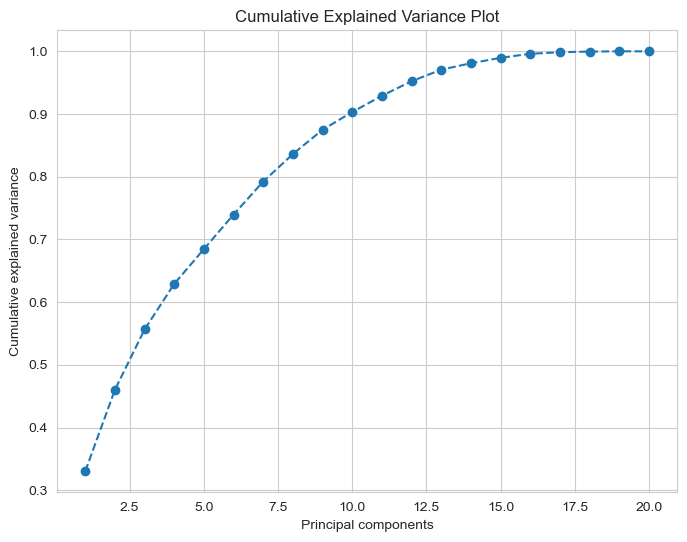

In [37]:
from sklearn.decomposition import PCA
pca = PCA()

# Apply PCA on training set
pca.fit(x_train_resampled)

# Create explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Draw cumulative PCA plot
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Plot')
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid(True)
plt.show()

In [38]:
# Print explained variance ratio and cumulative explained variance for each principal component
df_pca = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Variance': np.cumsum(explained_variance_ratio)
})

print(df_pca)

      PC  Explained Variance Ratio  Cumulative Variance
0    PC1                  0.330186             0.330186
1    PC2                  0.129989             0.460175
2    PC3                  0.096210             0.556385
3    PC4                  0.072730             0.629115
4    PC5                  0.055506             0.684621
5    PC6                  0.055060             0.739681
6    PC7                  0.052612             0.792293
7    PC8                  0.043902             0.836194
8    PC9                  0.038730             0.874924
9   PC10                  0.028205             0.903129
10  PC11                  0.025983             0.929111
11  PC12                  0.023175             0.952286
12  PC13                  0.018424             0.970710
13  PC14                  0.010250             0.980960
14  PC15                  0.008662             0.989622
15  PC16                  0.006441             0.996064
16  PC17                  0.002487             0

- Rules of thumbs: Keep the lowest components that explain from 90-95% of the total variance

In [39]:
# Create PCA on x_train_resampled and x_test_scaled
pca = PCA(n_components=10)
x_train_pca = pca.fit_transform(x_train_resampled)
x_test_pca = pca.transform(x_test_scaled)

## 4.5 Classification Models

### 4.5.1 Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,  precision_score, recall_score, f1_score

# Create and train the model
log_reg = LogisticRegression(random_state=101)
log_reg.fit(x_train_pca, y_train_resampled)

# Predict on training and test set
y_pred_train_log = log_reg.predict(x_train_pca)
y_pred_test_log = log_reg.predict(x_test_pca)

# Calculate accuracy score and classification report on training set
accuracy_train_log = accuracy_score(y_train_resampled, y_pred_train_log)
report_train_log = classification_report(y_train_resampled, y_pred_train_log)
print(f'Logistic Regression Training Accuracy: {accuracy_train_log:.4f}')
print('Train Classification Report:\n', report_train_log)

# # Calculate accuracy score and classification report on test set
accuracy_test_log = accuracy_score(y_test, y_pred_test_log)
report_test_log = classification_report(y_test, y_pred_test_log)
print(f'Logistic Regression Test Accuracy: {accuracy_test_log:.4f}')
print('Test Classification Report:\n', report_test_log)

# Calculate mean precision, recall và F1-score
mean_precision_log = precision_score(y_test, y_pred_test_log, average='macro')
mean_recall_log = recall_score(y_test, y_pred_test_log, average='macro')
mean_f1_score_log = f1_score(y_test, y_pred_test_log, average='macro')
print(f'Mean Precision: {mean_precision_log:.4f}')
print(f'Mean Recall: {mean_recall_log:.4f}')
print(f'Mean F1-Score: {mean_f1_score_log:.4f}')

Logistic Regression Training Accuracy: 0.5585
Train Classification Report:
               precision    recall  f1-score   support

         0.0       0.59      0.68      0.63     23983
         1.0       0.49      0.46      0.47     23983
         2.0       0.59      0.54      0.56     23983

    accuracy                           0.56     71949
   macro avg       0.56      0.56      0.56     71949
weighted avg       0.56      0.56      0.56     71949

Logistic Regression Test Accuracy: 0.6482
Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.68      0.79     10278
         1.0       0.20      0.45      0.28      1337
         2.0       0.20      0.53      0.30       740

    accuracy                           0.65     12355
   macro avg       0.45      0.55      0.46     12355
weighted avg       0.81      0.65      0.70     12355

Mean Precision: 0.4479
Mean Recall: 0.5539
Mean F1-Score: 0.4551


Advantages: Logistic Regression is computationally efficient, easy to implement. In this study, its simplicity makes it less prone to overfitting with the reduced 10 PC feature set.

Disadvantages: It assumes linearity and independence of features, which may not fully capture the complex, nonlinear relationships in coral bleaching data (e.g., interactions between SSTA and Windspeed). It also struggles with imbalanced datasets unless mitigated via SMOTE, and its performance may reduce with high multicollinearity, though PCA may help address this.

Evaluation Metric Analysis: 
- Training Performance: The training has a moderate accuracy score (0.56). Macro and weighted averages are also consistent at 0.56 for precision, recall, and F1-score, indicating uniform performance across classes but moderate accuracy, suggesting the model fits the training data reasonably

- Test Performance: The test accuracy (0.6482) exceeds training (0.5585), suggesting that the test set might be easier or less noisy than the training set. This difference can potentially indicates underfitting model as well. Moreover, the low F1 scores for Classes 1 and 2 (0.28 and 0.30 respectively) highlight difficulty in predicting minority classes. The high precision for Class 0 (0.93) with moderate recall (0.68) indicates that the model is good at identifying Mild bleaching but misses many Moderate and Severe cases


### 4.5.2 Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

# Create and train the model
model_nb = GaussianNB()
model_nb.fit(x_train_pca, y_train_resampled)

# Predict on training and test set
y_pred_train_nb = model_nb.predict(x_train_pca)
y_pred_test_nb = model_nb.predict(x_test_pca)

# Calculate accuracy score and classification report on training set
accuracy_train_nb = accuracy_score(y_train_resampled, y_pred_train_nb)
report_train_nb = classification_report(y_train_resampled, y_pred_train_nb)
print(f"Naive Bayes Train Accuracy: {accuracy_train_nb:.4f}")
print('Trainining Classification Report:\n', report_train_nb)

# Calculate accuracy score and classification report on test set
accuracy_test_nb = accuracy_score(y_test, y_pred_test_nb)
report_test_nb = classification_report(y_test, y_pred_test_nb)
print(f"Naive Bayes Test Accuracy: {accuracy_test_nb:.4f}")
print('Test Classification Report:\n', report_test_nb)

# Calculate mean precision, recall và F1-score on test set
mean_precision_nb = precision_score(y_test, y_pred_test_nb, average='macro')
mean_recall_nb = recall_score(y_test, y_pred_test_nb, average='macro')
mean_f1_score_nb = f1_score(y_test, y_pred_test_nb, average='macro')
print(f"Mean Precision: {mean_precision_nb:.4f}")
print(f"Mean Recall: {mean_recall_nb:.4f}")
print(f"Mean F1-Score: {mean_f1_score_nb:.4f}")

Naive Bayes Train Accuracy: 0.5486
Trainining Classification Report:
               precision    recall  f1-score   support

         0.0       0.52      0.79      0.63     23983
         1.0       0.54      0.32      0.40     23983
         2.0       0.59      0.53      0.56     23983

    accuracy                           0.55     71949
   macro avg       0.55      0.55      0.53     71949
weighted avg       0.55      0.55      0.53     71949

Naive Bayes Test Accuracy: 0.7251
Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.79      0.85     10278
         1.0       0.24      0.33      0.28      1337
         2.0       0.23      0.53      0.32       740

    accuracy                           0.73     12355
   macro avg       0.46      0.55      0.48     12355
weighted avg       0.80      0.73      0.76     12355

Mean Precision: 0.4645
Mean Recall: 0.5505
Mean F1-Score: 0.4842


Advantages: Naive Bayes is computationally efficient and performs well with high-dimensional data, making it a good fit for the reduce 10 PC feature set. It is particularly effective for imbalanced datasets when combined with SMOTE, providing fast training and interpretable probability estimates.

Disadvantages: The independence assumption may not hold for correlated features (e.g., Temperature_Kelvin and TSA at 0.85), potentially underestimating complex interactions in coral bleaching data. It can also be sensitive to feature scaling and may struggle with noisy or overlapping class distributions

Evaluation Metric Analysis:
- Training performance: Similar to Logistic Regression, Naïve Bayes training set has a moderate accuracy score (0.55). The macro and weighted average scores are consistently at 0.55 for precision, recall, and F1 score, indicating balanced performance across classes but the accuracy is average, indicating consistent training with some limitations.

- Testing performance: The test accuracy of 0.72 is much greater than training, suggesting that there is significant underfitting. The high F1 score for Class 0 (0.85) with strong recall (0.79) shows excellent prediction of Mild bleaching, while Classes 1 and 2 have lower F1 scores (0.28 and 0.32), indicating challenges with minority classes, consistent with the imbalanced test set


### 4.5.3 Decision Tree

In [42]:
# Hyperparameter Tuning with GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter values to optimize
param_grid = {
    'max_depth': range(1, 20),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Apply GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(random_state=101), param_grid, refit=True, verbose=2, cv=5)
grid.fit(x_train_pca, y_train_resampled)

# Get the best model
best_tree_model = grid.best_estimator_

# Train the model
best_tree_model.fit(x_train_pca, y_train_resampled)

# Predict the model on training and test set
y_pred_train_dt = best_tree_model.predict(x_train_pca)
y_pred_test_dt = best_tree_model.predict(x_test_pca)


# Calculate accuracy score and classification report on training set
accuracy_train_dt = accuracy_score(y_train_resampled, y_pred_train_dt)
report_train_dt = classification_report(y_train_resampled, y_pred_train_dt)
print(f"Decision Tree Training accuracy: {accuracy_train_dt:.4f}")
print('Train Classification Report:\n', report_train_dt)

# Calculate accuracy score and classification report on test set
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)
report_test_dt = classification_report(y_test, y_pred_test_dt)
print(f"Decision Tree Test accucary: {accuracy_test_dt:.4f}")
print('Test Classification report:\n', report_test_dt)

# Calculate mean precision, recall và F1-score on test set
mean_precision_dt = precision_score(y_test, y_pred_test_dt, average='macro')
mean_recall_dt = recall_score(y_test, y_pred_test_dt, average='macro')
mean_f1_score_dt = f1_score(y_test, y_pred_test_dt, average='macro')
print(f'Mean Precision: {mean_precision_dt:.4f}')
print(f'Mean Recall: {mean_recall_dt:.4f}')
print(f'Mean F1-Score: {mean_f1_score_dt:.4f}')

Fitting 5 folds for each of 171 candidates, totalling 855 fits
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_

Advantages: Decision Trees can model nonlinear relationships and interactions between features (e.g., SSTA and Temperature_Kelvin), offering flexibility over Logistic Regression. They also handle multiclass problems well and align with the balanced training set.

Disadvantages: They are prone to overfitting, especially with deep trees, and can be sensitive to small data variations. The high dimensionality (even after PCA) may still challenge performance unless tuned, requiring hyperparameter optimization.

Evaluation Metric Analysis: 
- Training Performance: The training set has a very high accuracy score of 0.97, with macro and weighted averages are consistent at 0.97 for precision, recall, and F1-score. However, this might indicate near-perfect training fit, suggesting potential overfitting.
- Test Performance: The test accuracy (0.78) is significantly lower than training (0.97), confirming overfitting despite applying hyperparameter tuning. The high F1 score for Class 0 (0.88) with strong recall (0.83) shows good prediction of Mild bleaching, but Classes 1 and 2 still have lower F1 scores (0.42, 0.39), indicating challenges with minority classes

### 4.5.4 Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'max_depth': [None, 10, 20],  # Maximum depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node 
    'min_samples_leaf': [1, 2, 4], # Minimum samples to form a leaf
}

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=101), param_grid=param_grid, cv=5)
grid_search.fit(x_train_pca, y_train_resampled)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [44]:
# Use the best model
best_rf_model = grid_search.best_estimator_

# Predict on training and test sets
y_pred_train_rf = best_rf_model.predict(x_train_pca)
y_pred_test_rf = best_rf_model.predict(x_test_pca)

# Evaluate on training set
accuracy_train_rf = accuracy_score(y_train_resampled, y_pred_train_rf)
report_train_rf = classification_report(y_train_resampled, y_pred_train_rf)
print(f"\nRandom Forest Training Accuracy: {accuracy_train_rf:.4f}")
print("Training Classification Report:\n", report_train_rf)

# Evaluate on test set
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
report_test_rf = classification_report(y_test, y_pred_test_rf)
print(f"Random Forest Test Accuracy: {accuracy_test_rf:.4f}")
print("Test Classification Report:\n", report_test_rf)

# Calculate mean precision, recall, and F1-score on test set
mean_precision_rf = precision_score(y_test, y_pred_test_rf, average='macro')
mean_recall_rf = recall_score(y_test, y_pred_test_rf, average='macro')
mean_f1_score_rf = f1_score(y_test, y_pred_test_rf, average='macro')
print(f'Mean Precision: {mean_precision_rf:.4f}')
print(f'Mean Recall: {mean_recall_rf:.4f}')
print(f'Mean F1-Score: {mean_f1_score_rf:.4f}')


Random Forest Training Accuracy: 0.9978
Training Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     23983
         1.0       1.00      1.00      1.00     23983
         2.0       1.00      1.00      1.00     23983

    accuracy                           1.00     71949
   macro avg       1.00      1.00      1.00     71949
weighted avg       1.00      1.00      1.00     71949

Random Forest Test Accuracy: 0.8705
Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     10278
         1.0       0.51      0.56      0.53      1337
         2.0       0.55      0.57      0.56       740

    accuracy                           0.87     12355
   macro avg       0.67      0.69      0.68     12355
weighted avg       0.88      0.87      0.87     12355

Mean Precision: 0.6681
Mean Recall: 0.6853
Mean F1-Score: 0.6763


Advantages: Random Forest improves upon single Decision Trees by reducing overfitting via averaging multiple trees, capturing nonlinear interactions, and handling high-dimensional data effectively with the PCA-reduced feature set.

Disadvantages: It can be computationally intensive and less interpretable than simpler models. If not adjusted, its performance may plateau with highly imbalanced test sets

Evaluation Metric Analysis:
- Training Performance: The model achieves a perfect accuracy of 1.00 on the training set, with macro and weighted averages also at 1.00 for precision, recall, and F1 score. While this indicates the model fits the training data extremely well, it also raises concerns about overfitting, as such perfect performance is uncommon on real-world datasets and may not generalize well to unseen data.

- Test Performance: The test accuracy (0.87) is lower than training (0.9978), confirming overfitting despite being tuned. The high F1-score for Class 0 (0.94) with strong recall (0.93) shows excellent prediction of Mild bleaching, while Classes 1 and 2 have moderate F1-scores (0.53, 0.56), indicating improved but still limited prediction of minority classes

### 4.5.5 ANN

In [45]:
from sklearn.neural_network import MLPClassifier

# Build ANN models with hyperparameters
mlp_model = MLPClassifier(hidden_layer_sizes=(60, 3),  # 60 nodes in the first hidden layer and 3 nodes in the second
                      learning_rate='constant',  # Learn with a constant learning rate
                      max_iter=250,  # Maximum number of iterations
                      random_state=101)

# Train the model on the training set
mlp_model.fit(x_train_pca, y_train_resampled)

# Predict on training and test sets
y_pred_train_mlp = mlp_model.predict(x_train_pca)
y_pred_test_mlp = mlp_model.predict(x_test_pca)  

# Evaluate on training set
accuracy_train_mlp = accuracy_score(y_train_resampled, y_pred_train_mlp)
report_train_mlp = classification_report(y_train_resampled, y_pred_train_mlp)
print(f"Training accuracy of MLP model: {accuracy_train_mlp:.4f}")
print("Training Classification Report:\n", report_train_mlp)

# Evaluate on test set
accuracy_test_mlp = accuracy_score(y_test, y_pred_test_mlp)
report_test_mlp = classification_report(y_test, y_pred_test_mlp)
print(f"Test accuracy of MLP model: {accuracy_test_mlp:.4f}")
print("Test Classification Report:\n", report_test_mlp)

# Calculate mean precision, recall, and F1-score on test set
mean_precision_mlp = precision_score(y_test, y_pred_test_mlp, average='macro')
mean_recall_mlp = recall_score(y_test, y_pred_test_mlp, average='macro')
mean_f1_score_mlp = f1_score(y_test, y_pred_test_mlp, average='macro')
print(f'Mean Precision: {mean_precision_mlp:.4f}')
print(f'Mean Recall: {mean_recall_mlp:.4f}')
print(f'Mean F1-Score: {mean_f1_score_mlp:.4f}')

Training accuracy of MLP model: 0.7450
Training Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.78      0.78     23983
         1.0       0.67      0.67      0.67     23983
         2.0       0.78      0.79      0.78     23983

    accuracy                           0.75     71949
   macro avg       0.75      0.75      0.75     71949
weighted avg       0.75      0.75      0.75     71949

Test accuracy of MLP model: 0.7382
Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.77      0.85     10278
         1.0       0.27      0.55      0.36      1337
         2.0       0.33      0.60      0.43       740

    accuracy                           0.74     12355
   macro avg       0.52      0.64      0.55     12355
weighted avg       0.84      0.74      0.77     12355

Mean Precision: 0.5187
Mean Recall: 0.6391
Mean F1-Score: 0.5478


Advantages: ANNs excel at modeling complex, nonlinear, making them suitable for the intricate patterns in coral bleaching data. They can learn hierarchical feature representations, which can outperform tree-based models on PCA-derived features.

Disadvantages: ANNs are computationally intensive, require careful tuning to avoid overfitting, and lack interpretability compared to simpler models. They also need standardized data and balanced dataset

Evaluation Metric Analysis:
- Training Performance: The model has a training accuracy of 0.74, with macro and weighted averages are consistent for precision, recall, and F1-score. This indicates that the model has a moderate performance with balanced class prediction, suggesting a reasonable fit without severe overfitting.
- Test performance: The test accuracy stays the same with the train accuracy (0.74), suggesting no overfitting and effective generalization aided by SMOTE. The high F1-score for Class 0 (0.85) with strong recall (0.77) shows good prediction of Mild bleaching, while Classes 1 and 2 have lower F1-scores (0.36, 0.43), indicating that the challenges with minority classes still remain

# 5.0 Summary

## 5.1 Summary of Machine Learning models

In [46]:
table_result = pd.DataFrame({
    'Model': ['Logistic Reg', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'ANN'],
    'Train Accuracy': [accuracy_train_log, accuracy_train_nb, accuracy_train_dt, accuracy_train_rf, accuracy_train_mlp],
    'Test Accuracy': [accuracy_test_log, accuracy_test_nb, accuracy_test_dt, accuracy_test_rf, accuracy_test_mlp],
    'Mean Precision': [mean_precision_log, mean_precision_nb, mean_precision_dt, mean_precision_rf, mean_precision_mlp],
    'Mean Recall': [mean_recall_log, mean_recall_nb, mean_recall_dt, mean_recall_rf, mean_recall_mlp],
    'Mean F1-Score': [mean_f1_score_log, mean_f1_score_nb, mean_f1_score_dt, mean_f1_score_rf, mean_f1_score_mlp]
})
print(table_result)

           Model  Train Accuracy  Test Accuracy  Mean Precision  Mean Recall  \
0   Logistic Reg        0.558493       0.648159        0.447892     0.553907   
1    Naive Bayes        0.548583       0.725132        0.464461     0.550467   
2  Decision Tree        0.968505       0.781060        0.534411     0.623323   
3  Random Forest        0.997790       0.870498        0.668131     0.685314   
4            ANN        0.745014       0.738163        0.518691     0.639083   

   Mean F1-Score  
0       0.455104  
1       0.484247  
2       0.564221  
3       0.676340  
4       0.547827  


- The analysis of the five models, Logistic Regression, Naive Bayes, Decision Tree, Random Forest, and Artificial Neural Network (ANN) reveals distinct performance trends across training and test datasets. Random Forest achieves the highest accuracy scores on both training and test data, alongside the best mean precision (0.67), recall (0.68), and F1 score (0.68). However, the substantial gap between training and test accuracy strongly suggests overfitting, indicating the model may not generalize well to new data.

- In contrast, ANN, having lower precision, recall and F1 score than Random Forest, its small gap between training and test accuracy suggest that the model is less likely to have overfitting risk than Random Forest, indicating robustness and a more balanced performance.

- A critical challenge across all models is their limited ability to predict minority classes (Moderate and Severe bleaching), despite I already applied SMOTE to balance the training set. The mean precision, recall, and F1-scores, which hover around or just above average, indicating that while over half of the actual or predicted value are correctly classified, the models struggle with the less frequent classes. This suggests that the current feature set or preprocessing may not fully capture the dynamics of severe bleaching events.

- Between Random Forest and ANN, neither of them is the best for predicting coral reef bleaching. Random Forest excels in overall accuracy but risks overfitting, while ANN offers robustness with a more stable performance across datasets but lower predictive power. Both models have notable strengths and limitation. Additional data exploration such as revisiting feature engineering, exploring alternative balancing techniques, or importing more sufficient data, could enhance model performance, particularly for minority class prediction.


## 5.2 Feature Importance Analysis for Coral Reef Bleaching

### 5.2.1 Visualize the weights of features in each PCA component

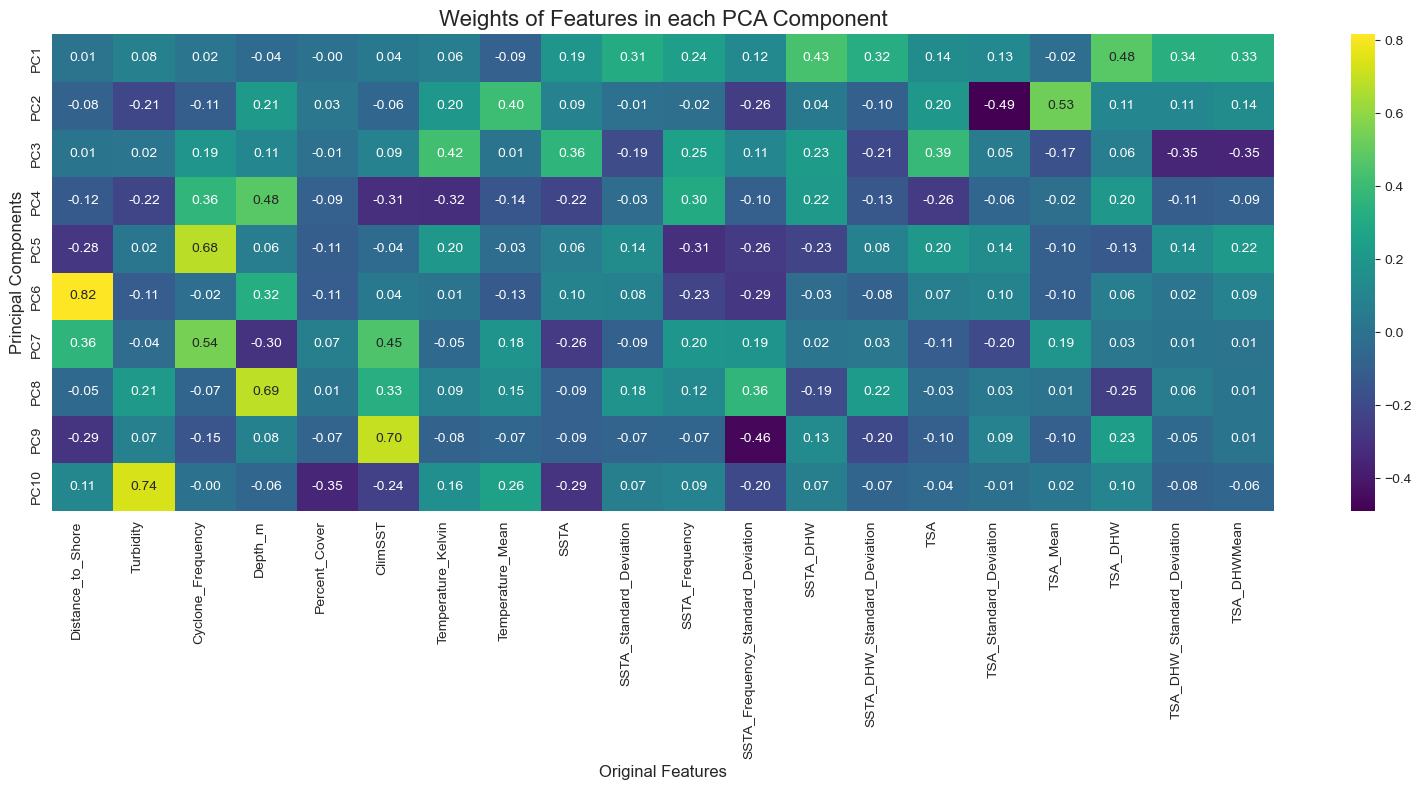

In [47]:
plt.figure(figsize=(16, 8))
plt.xticks(rotation=45, ha='right')
sns.heatmap(pca.components_, cmap="viridis", annot=True, fmt='.2f',
            xticklabels=x_train.columns,
            yticklabels=[f"PC{i+1}" for i in range(pca.components_.shape[0])])
plt.title("Weights of Features in each PCA Component", fontsize=16)
plt.xlabel("Original Features", fontsize=12)
plt.ylabel("Principal Components", fontsize=12)
plt.tight_layout()
plt.show();

- In the lower portion of the heatmap (PC5 to PC10), features such as Distance_to_Shore, Turbidity, Cyclone_Frequency, Depth_m, and ClimSST exhibit dominant positive weights. This suggests that these components are primarily influenced by those specific features(for example, PC6 is largely driven by Distance_to_Shore). 

### 5.2.2 Visualize Feature Importance via PCA and Random Forest

C:\Users\phamn\AppData\Local\Temp\ipykernel_19912\2186178360.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Combined Importance', y='Feature', data=df_combined, palette="magma")


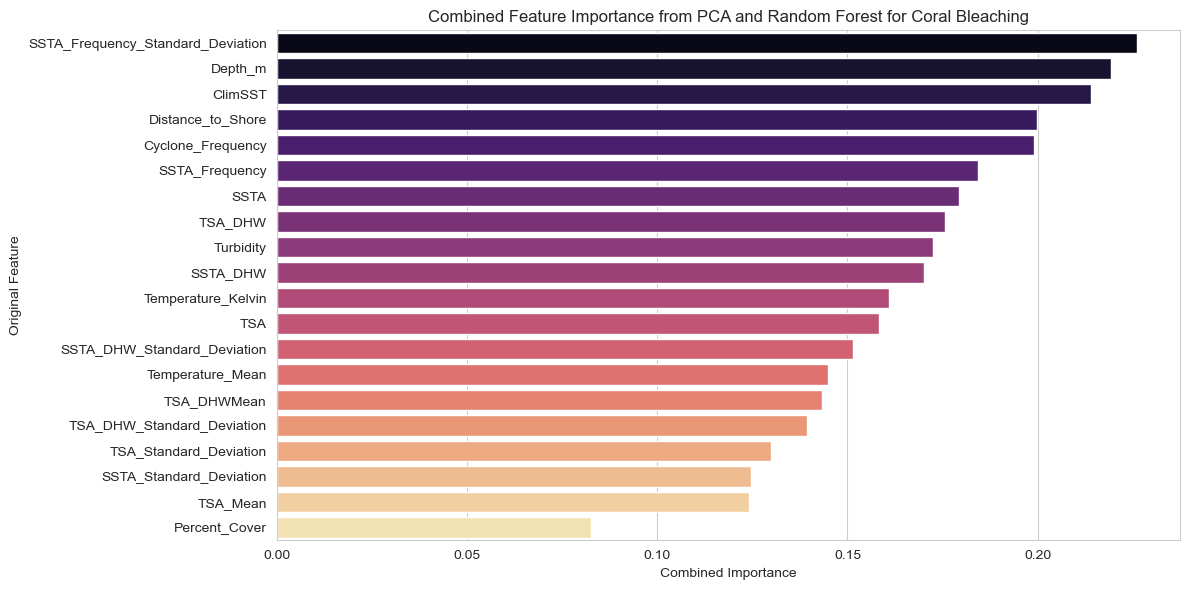

In [48]:
# Multiply PCA weights with Random Forest weights
combined_importance = np.dot(np.abs(pca.components_.T), np.abs(best_rf_model.feature_importances_)) 
# pca.components_.T: Transposing to shape (n_features, n_components) so I can multiply by feature importances
# np.dot: Distribute the combined importance of each component back to original features

# Create DataFrame
df_combined = pd.DataFrame({
    'Feature': x_train.columns,
    'Combined Importance': combined_importance
}).sort_values(by='Combined Importance', ascending=False)

# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(x='Combined Importance', y='Feature', data=df_combined, palette="magma")
plt.title("Combined Feature Importance from PCA and Random Forest for Coral Bleaching")
plt.xlabel("Combined Importance")
plt.ylabel("Original Feature")
plt.tight_layout()
plt.show();

- This approach highlighted SSTA_Frequency_Standard_Deviation as the most influential feature, followed by Depth_m, ClimSST, Distance_to_Shore, and Cyclone_Frequency.
Also, Turbidity, which stood out in the initial PCA heatmap, appeared less significant after incorporating the Random Forest model with PCA. 

### 5.2.3 Visualize Feature Importance via PCA and MLP

C:\Users\phamn\AppData\Local\Temp\ipykernel_19912\2647010321.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Combined Importance', y='Feature', data=df_combined, palette="crest")


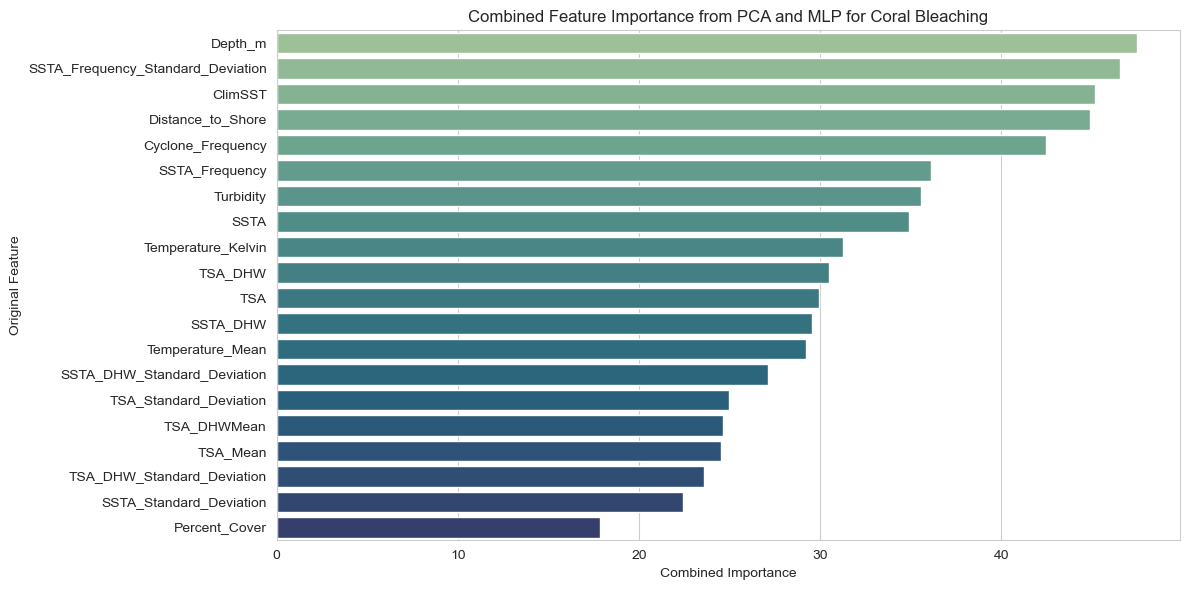

In [ ]:
# Extract Absolute Input Layer Weights from MLP
mlp_input_weights = np.abs(mlp_model.coefs_[0])

# Sum the absolute weights across the neurons in the first hidden layer
importance_mlp = mlp_input_weights.sum(axis=1)

# Project MLP importance back to original features through PCA
combined_importance = np.dot(np.abs(pca.components_.T), np.abs(importance_mlp))

# Create DataFrame
df_combined = pd.DataFrame({
    'Feature': x_train.columns,
    'Combined Importance': combined_importance
}).sort_values(by='Combined Importance', ascending=False)

# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(x='Combined Importance', y='Feature', data=df_combined, palette="crest")
plt.title("Combined Feature Importance from PCA and MLP for Coral Bleaching")
plt.xlabel("Combined Importance")
plt.ylabel("Original Feature")
plt.tight_layout()
plt.show();

- The results showed that the top five important features remained consistent with the PCA-Random Forest analysis: Depth_m, SSTA_Frequency_Standard_Deviation, ClimSST, Distance_to_Shore, and Cyclone_Frequency. 

- However, a notable change occurred where Depth_m and SSTA_Frequency_Standard_Deviation swapped positions, with Depth_m now ranking first
